Student name: Ahmad Rashidh Ameer Hamsha

Student id: 23264306

# Task: Deep neural networks

#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Get the data an manipulate

We're going to use the Fashion MNIST dataset, which we can download from OpenML.

Fashion-MNIST is a dataset of Zalando's article images—consisting of a set of 60,000 samples. Each sample is a 28x28 grayscale image, associated with a label from 10 classes.

Label IDs:
* T-shirt/top - 0
* Trouser - 1
* Pullover - 2
* Dress - 3
* Coat - 4
* Sandal - 5
* Shirt - 6
* Sneaker - 7
* Bag - 8
* Ankle boot - 9

We'll load up the Fashion-MNIST dataset. It will take a few seconds.


In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("Fashion-MNIST", version=1, return_X_y=True, as_frame=False)

text_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Let's also visualise a few random samples of this

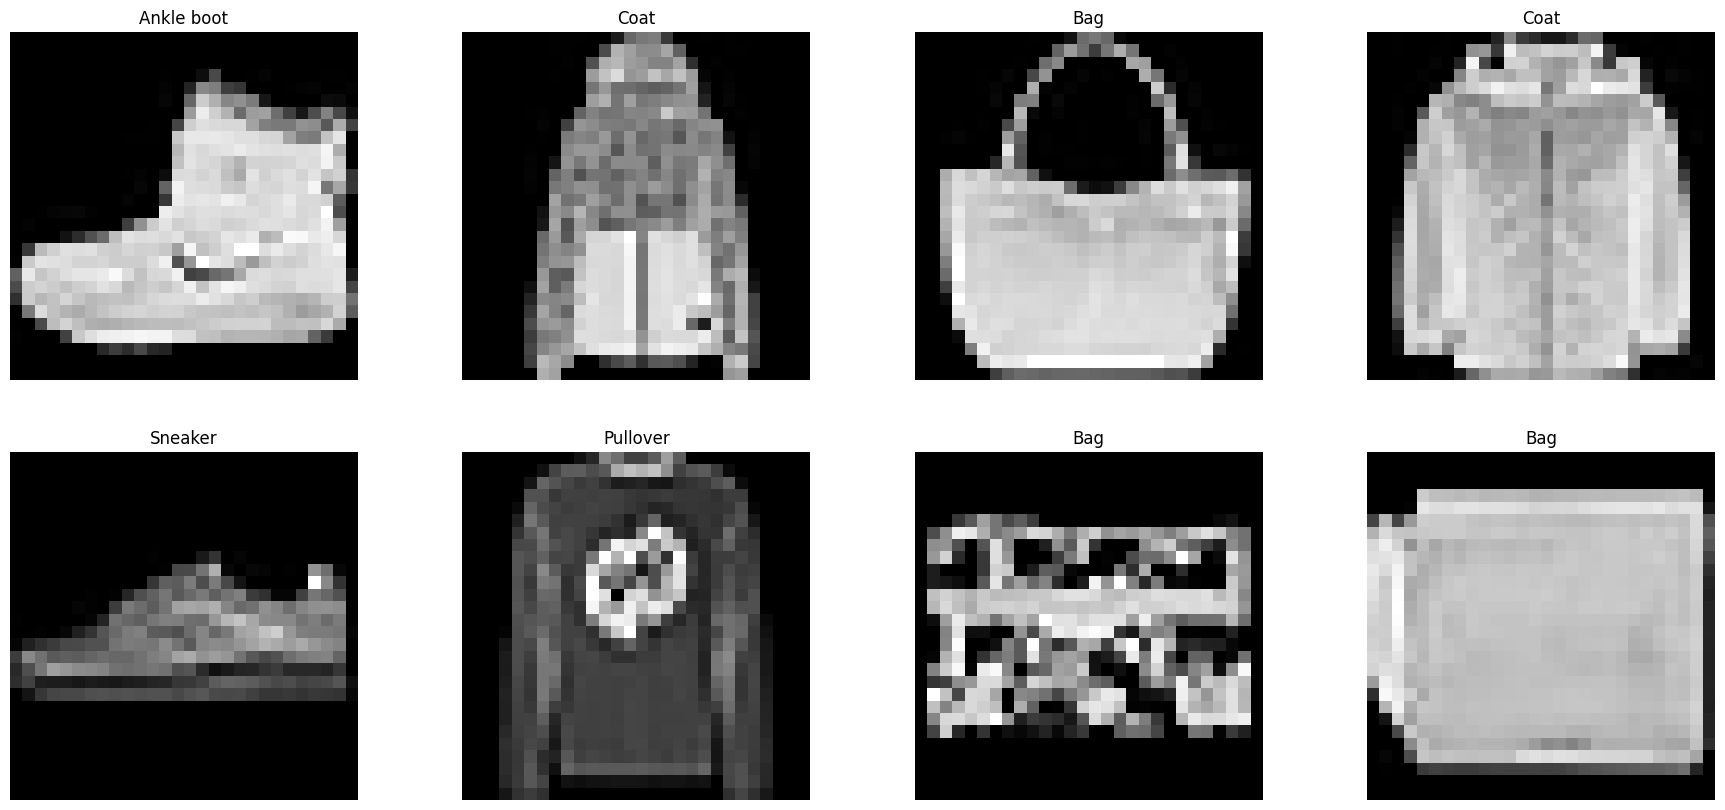

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# You can put between 0 to 59999 here
index = (0, 22, 100, 555, 666, 123, 10000, 55005)

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Visualize the image

fig, ax = plt.subplots(2, 4, figsize=(22, 10))
fig.subplots_adjust(wspace=0.3)
ax = ax.flatten()

for i in range(len(index)):
    ax[i].imshow(np.reshape(X[index[i]], (-1, 28)), cmap='gray', vmin=0, vmax=255)
    ax[i].axis('off')  # clear x-axis and y-axis
    ax[i].set_title(text_labels[int(y[index[i]])])

plt.show()

### Data manipulation

Firstly, do a train/test split. Keep 20% of the data for test. Fix the `random_state` so that the test is completely repeatible.

Then use the `StandardScaler` function from `sklearn.preprocessing`, as the multi-layer perceptron can be quite sensitive to data scaling.

<span style="color:red">Insert your code below</span>.

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train)
X_test_std = std_scaler.transform(X_test)

## Task 1: Train a Perceptron

1. A single artifical neuron is a Perceptron, so use `sklearn`'s implementation of the Percpetron, and train it.
2. Calculate and print the accuracy
3. Discuss the result, does it seem good or bad?
4. Find an example where the classification is incorrect, and plot it. Discuss (e.g. does it kind of look like the clothing item that was predicted?)
5. Multiclass perceptron? We learned that the Percpetron is a binary classifier. Give a brief description of how multi-class perceptron might work. Of course, use the internet, but give it to me in your own words, and use a diagram as appropriate.

<span style="color:red">Insert your code below</span>.

In [30]:
from sklearn.linear_model import Perceptron as Perceptron

model = Perceptron(verbose=1, eta0=0.1)
model.fit(X_train_std, y_train)
y_pred = model.predict(X_test_std)


-- Epoch 1
Norm: 43.95, NNZs: 784, Bias: -83.500000, T: 56000, Avg. loss: 2.040820
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 51.04, NNZs: 784, Bias: -96.700000, T: 112000, Avg. loss: 2.050432
Total training time: 0.32 seconds.
-- Epoch 3
Norm: 62.70, NNZs: 784, Bias: -103.800000, T: 168000, Avg. loss: 2.030279
Total training time: 0.42 seconds.
-- Epoch 4
Norm: 63.81, NNZs: 784, Bias: -109.700000, T: 224000, Avg. loss: 2.058182
Total training time: 0.57 seconds.
-- Epoch 5
Norm: 65.84, NNZs: 784, Bias: -112.700000, T: 280000, Avg. loss: 1.994163
Total training time: 0.78 seconds.
-- Epoch 6
Norm: 69.24, NNZs: 784, Bias: -115.800000, T: 336000, Avg. loss: 2.007852
Total training time: 0.97 seconds.
-- Epoch 7
Norm: 72.36, NNZs: 784, Bias: -117.400000, T: 392000, Avg. loss: 1.966347
Total training time: 1.14 seconds.
-- Epoch 8
Norm: 77.21, NNZs: 784, Bias: -120.200000, T: 448000, Avg. loss: 1.991238
Total training time: 1.25 seconds.
-- Epoch 9
Norm: 77.64, NNZs: 784, Bias: -1

Perceptron Accuracy Score: 0.8069285714285714
y_test_i = Sandal, y_pred_i = Pullover


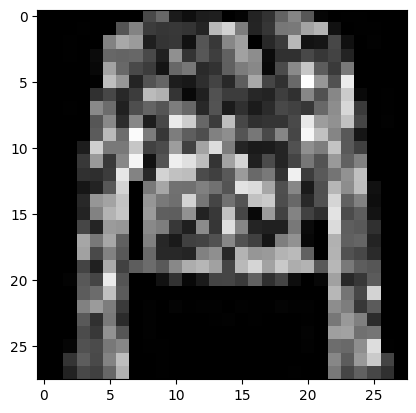

In [31]:
from sklearn.metrics import accuracy_score


print("Perceptron Accuracy Score:", accuracy_score(y_test, y_pred))

firstMismatchIndex = None
for i in range(len(y_test)):
  if y_test[i] != y_pred[i]:
    firstMismatchIndex = i
    break
  continue

print(f"y_test_i = {text_labels[int(y_train[i])]}, y_pred_i = {text_labels[int(y_pred[i])]}")
plt.imshow(np.reshape(X_test[i], (-1, 28)), cmap='gray', vmin=0, vmax=255)



The accuracy is not too bad for a simple linear classifier. However, as with all of these types of problems, most of the effort will go into gaining small, but important imporvements. Let's see if we can make it better.

- As we can see in above image belongs to "Sandal" category but predicted as "pullover" category.

- Sandals and pullovers may share characteristics such as length, and general form. If these traits are evident in the image, the model may be unable to differentiate between them, particularly if the resolution is poor or the object is displayed in such a manner that defining features are obscured.

## Task 2: Train a multi-layer Perceptron with one hidden layer (of width 20)

Let's try going wide first

* Set the regularizing parameter to 0.1 (alpha = 0.1). We have looked at regularisation before in the context of machine learning algorithms. It is important, but we won't investigate it further here. We'll leave this fixed.
* Set verbose = 1, so we can look at what is happenign on each epoch (iteration)
* Set random_state=1 (or some constant), so the test is repeatible
* For the moment, set hidden_layer_sizes to (20,).

This tuple then sets the number of hidden layers. The number of values in the tuple is the number of layers, and the number of each value is the number of nodes in that layer. So a tuple of (50,30,10) would be one layer with 50 nodes, connect to a second hidden layer with 30 nodes and a final hidden layer with 10 nodes). But for the moment, just go for one hidden layer with 20 nodes.

Also print the __training and accuracy score__ of our current network (remember the `accuracy_score` function from `sklearn.metrics`?). The score on the test dataset should not be too bad at this point. That's quite impressive for a first stab at a neural network. Let's see if we can do better, though!

<span style="color:red">Insert your code below</span>.

In [10]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(verbose=True, alpha=0.1,hidden_layer_sizes=(20,), random_state=1)
mlp.fit(X_train_std, y_train)

mlp_y_train_pred = mlp.predict(X_train_std)
mlp_y_test_pred = mlp.predict(X_test_std)


Iteration 1, loss = 0.63949593
Iteration 2, loss = 0.43450261
Iteration 3, loss = 0.40207574
Iteration 4, loss = 0.38022999
Iteration 5, loss = 0.36728924
Iteration 6, loss = 0.35780703
Iteration 7, loss = 0.34773033
Iteration 8, loss = 0.34181939
Iteration 9, loss = 0.33489873
Iteration 10, loss = 0.32926184
Iteration 11, loss = 0.32561696
Iteration 12, loss = 0.32146271
Iteration 13, loss = 0.31825150
Iteration 14, loss = 0.31386332
Iteration 15, loss = 0.31107372
Iteration 16, loss = 0.30956362
Iteration 17, loss = 0.30648735
Iteration 18, loss = 0.30565991
Iteration 19, loss = 0.30185399
Iteration 20, loss = 0.30047796
Iteration 21, loss = 0.29856088
Iteration 22, loss = 0.29672392
Iteration 23, loss = 0.29683444
Iteration 24, loss = 0.29311680
Iteration 25, loss = 0.29102552
Iteration 26, loss = 0.29156721
Iteration 27, loss = 0.28991414
Iteration 28, loss = 0.28866048
Iteration 29, loss = 0.28896373
Iteration 30, loss = 0.28584656
Iteration 31, loss = 0.28579411
Iteration 32, los

In [11]:
from sklearn.metrics import accuracy_score

print("MLP Accuracy Score(20 Hidden Layer) - Test:", accuracy_score(y_test, mlp_y_test_pred))
print("MLP Accuracy Score(20 Hidden Layer) - Train:", accuracy_score(y_train, mlp_y_train_pred))




MLP Accuracy Score(20 Hidden Layer) - Test: 0.8675
MLP Accuracy Score(20 Hidden Layer) - Train: 0.9310535714285715


#### Questions: (answer here)

__1. What is the size of the input layer here? Explain__

Size of the input layer is the size of the number of features i.e. 28 * 28 = 784

__2. What is the size of the output layer here? Explain__

Size of the output layer is the number of class labels which is 10

__3. How many weights in total does the algorithm learn?__

The total number of weights in the network is the number of connections between layers along with biases. In the above case, there is single hidden layer of 20 nodes.

Input layer to hidden layer: 784 (input) * 20 (units in hidden layer) + 20 (biases) = 15,700 weights

Hidden layer to output layer: 20 (units in hidden layer) * 10 (output classes) + 10 (biases) = 210 weights

Total weights = 15,700 + 210 = 15,910 weights

__4. What does it mean that the training accuracy and the test accuracy are different?__

Training accuracy implies how well model fit the training data while test accuracy implies how well the model generalizes for unseen data. Higher test accuracy is a problem of overfitting

#### Wider, wider, wider

Let's go wider. We have quite a lot of input features, and somehow it might seem that if we immediately connect this to a layer with only 20 neurons that something might be lost?

Let's see if more features help!

Iterate over a wider number of neurons, and plot the train accuracy and test accuracy as a graph. For example, iterate over a set of widths of `(20, 50, 100, 200)`, or something similar.

Same as before, set `alpha=0.001` and set `random_state` to some constant (e.g. `random_state=42`)

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
import time

a_test = []
a_train = []

widths = (20, 50, 100, 200)
training_time = []
for w in widths:
  seconds = time.time()

  wmlp = MLPClassifier(verbose=1, alpha=0.001,hidden_layer_sizes=(w,), random_state=42)
  wmlp.fit(X_train_std, y_train)

  wmlp_y_train_pred = wmlp.predict(X_train_std)
  wmlp_y_test_pred = wmlp.predict(X_test_std)
  print(wmlp_y_train_pred)
  print(wmlp_y_test_pred)
  a_test.append(accuracy_score(y_test, wmlp_y_test_pred))
  a_train.append(accuracy_score(y_train, wmlp_y_train_pred))
  training_time.append(seconds - time.time())


------------Width: 20
Iteration 1, loss = 0.63849944
Iteration 2, loss = 0.41998448
Iteration 3, loss = 0.38384610
Iteration 4, loss = 0.36179433
Iteration 5, loss = 0.34563315
Iteration 6, loss = 0.33425887
Iteration 7, loss = 0.32319029
Iteration 8, loss = 0.31568614
Iteration 9, loss = 0.30890412
Iteration 10, loss = 0.30225346
Iteration 11, loss = 0.29594443
Iteration 12, loss = 0.29108048
Iteration 13, loss = 0.28711428
Iteration 14, loss = 0.28321784
Iteration 15, loss = 0.27776591
Iteration 16, loss = 0.27383339
Iteration 17, loss = 0.27057090
Iteration 18, loss = 0.26618698
Iteration 19, loss = 0.26522250
Iteration 20, loss = 0.26175118
Iteration 21, loss = 0.25839523
Iteration 22, loss = 0.25542304
Iteration 23, loss = 0.25388766
Iteration 24, loss = 0.24949856
Iteration 25, loss = 0.24729749
Iteration 26, loss = 0.24538469
Iteration 27, loss = 0.24286638
Iteration 28, loss = 0.24051047
Iteration 29, loss = 0.24066139
Iteration 30, loss = 0.23631139
Iteration 31, loss = 0.2341

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


['5' '0' '6' ... '3' '7' '2']
['4' '3' '4' ... '1' '5' '4']
------------Width: 50
Iteration 1, loss = 0.52843311
Iteration 2, loss = 0.37042459
Iteration 3, loss = 0.33255719
Iteration 4, loss = 0.30926590
Iteration 5, loss = 0.28958032
Iteration 6, loss = 0.27748269
Iteration 7, loss = 0.26295169
Iteration 8, loss = 0.25088217
Iteration 9, loss = 0.24169088
Iteration 10, loss = 0.23225571
Iteration 11, loss = 0.22552658
Iteration 12, loss = 0.21883555
Iteration 13, loss = 0.21112587
Iteration 14, loss = 0.20234461
Iteration 15, loss = 0.19810741
Iteration 16, loss = 0.19236018
Iteration 17, loss = 0.18711008
Iteration 18, loss = 0.18297613
Iteration 19, loss = 0.17595649
Iteration 20, loss = 0.17241076
Iteration 21, loss = 0.16917467
Iteration 22, loss = 0.16622923
Iteration 23, loss = 0.15810061
Iteration 24, loss = 0.15539623
Iteration 25, loss = 0.15371815
Iteration 26, loss = 0.15059625
Iteration 27, loss = 0.14763341
Iteration 28, loss = 0.14151551
Iteration 29, loss = 0.14093266

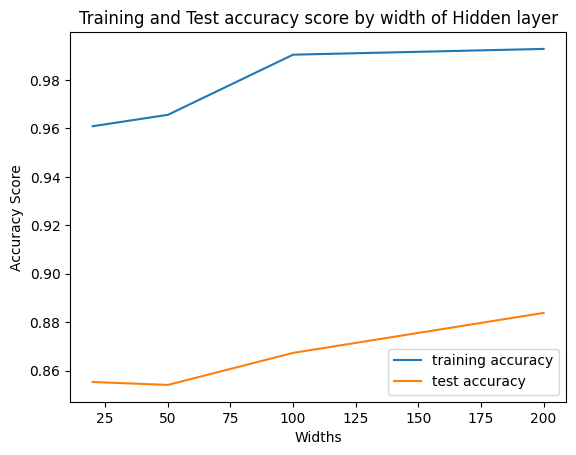

Training time: [-132.06622219085693, -157.5680923461914, -176.0753927230835, -185.1916787624359]
Width: 20 - Accuracy: 0.855
Width: 50 - Accuracy: 0.854
Width: 100 - Accuracy: 0.867
Width: 200 - Accuracy: 0.884


In [27]:
import matplotlib.pyplot as plt

plt.plot(widths, a_train, label='training accuracy')
plt.plot(widths, a_test, label='test accuracy')
plt.xlabel('Widths')
plt.ylabel('Accuracy Score')
plt.title('Training and Test accuracy score by width of Hidden layer')
plt.legend()
plt.show()


print("Training time:" , training_time)

for w, accuracy in zip(widths,a_test):
    print(f"Width: {w} - Accuracy: {accuracy:.3f}")


Questions:

__1. When you trained for all the different widths, did you notice anything about how long each training took? Discuss this.__

Training time increases as width increases, averagely it took about 162.5 ms.

__2. What can you infer from the graph?__

For the second question, think about the following:
* For the number of neurons you have tested, what is the best? (Highest performance -vs- lowest number of neurons)
* How many weights are learned by the algorithm for our optimal solution?
* Is there any evidence of overfitting occuring? Discuss this. What could we do to reduce this, if it is evident? (No need to implement anything to address tyhe overfitting, just comment)
(Hint: a large divergence between training accuracy and testing accuracy can indicate over-fitting).

__Answer__

From the graph, it is obvious that the accuracy of both test and training. 100 is the best, there after, only mild gradual improvement of accuracy is seen. 79510 weights are learned in our optimal solution. The divergence that test accuracy is substantially lower than the training accuracy, indicates overfitting. Regularization can help to reduce overfitting.




## Task 3: The deeper the better!

Previously, we only had a single hidden layer, and we went as wide as a couple of hundred neurons. That is a lot of neurons and a lot of computation. Can we do better with fewer neurons by going deeper and using more layers? Now we're going to start playing with different configurations.

Rerun the above loop, but let's use a set of deeper networks. These are going to be simply designed. I suggest to use something like:
`layers = ((20,20),(20,20,20),(50,20),(100,100,50))`

Plot the train and test accuracy as a graph.

Same as before, set `alpha=0.001` and set `random_state` to some constant (e.g. `random_state=42`)

**Note**: you might be feeling at this point that picking the neural network architecture is kind of random. At the moment, it is, to be honest. How many neurons per layer should I use? How many layers? And then I have to pick the training parameters on top of this?? These are all called hyperparameters of the network, and there is a lot of skill to develop to develop to be able to design networks efficiently and pick the right training parameters.

In [14]:

layers = ((20,20),(20,20,20),(50,20),(100,100,50))

a_test = []
a_train = []
final_y_pred = []

for l in layers:

  dmlp = MLPClassifier(verbose=1, alpha=0.001,hidden_layer_sizes=l, random_state=42)
  dmlp.fit(X_train_std, y_train)

  dmlp_y_train_pred = dmlp.predict(X_train_std)
  dmlp_y_test_pred = dmlp.predict(X_test_std)

  a_test.append(accuracy_score(y_test, dmlp_y_test_pred))
  a_train.append(accuracy_score(y_train, dmlp_y_train_pred))
  final_y_pred.append(dmlp_y_test_pred)



Iteration 1, loss = 0.68212231
Iteration 2, loss = 0.41377912
Iteration 3, loss = 0.37726727
Iteration 4, loss = 0.35386493
Iteration 5, loss = 0.33909348
Iteration 6, loss = 0.32658933
Iteration 7, loss = 0.31522282
Iteration 8, loss = 0.30829669
Iteration 9, loss = 0.30035369
Iteration 10, loss = 0.29326739
Iteration 11, loss = 0.28647617
Iteration 12, loss = 0.28085120
Iteration 13, loss = 0.27580108
Iteration 14, loss = 0.27128675
Iteration 15, loss = 0.26660340
Iteration 16, loss = 0.26223464
Iteration 17, loss = 0.26165517
Iteration 18, loss = 0.25639972
Iteration 19, loss = 0.25363189
Iteration 20, loss = 0.24878848
Iteration 21, loss = 0.24497790
Iteration 22, loss = 0.24261953
Iteration 23, loss = 0.24014772
Iteration 24, loss = 0.23809000
Iteration 25, loss = 0.23486343
Iteration 26, loss = 0.23224083
Iteration 27, loss = 0.22809514
Iteration 28, loss = 0.22758170
Iteration 29, loss = 0.22564413
Iteration 30, loss = 0.22407195
Iteration 31, loss = 0.22029554
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.77065126
Iteration 2, loss = 0.42082594
Iteration 3, loss = 0.37755356
Iteration 4, loss = 0.35576684
Iteration 5, loss = 0.33821028
Iteration 6, loss = 0.32642198
Iteration 7, loss = 0.31602971
Iteration 8, loss = 0.30663607
Iteration 9, loss = 0.29825365
Iteration 10, loss = 0.29296573
Iteration 11, loss = 0.28576621
Iteration 12, loss = 0.27974415
Iteration 13, loss = 0.27390085
Iteration 14, loss = 0.27100987
Iteration 15, loss = 0.26499810
Iteration 16, loss = 0.26134435
Iteration 17, loss = 0.25796170
Iteration 18, loss = 0.25407962
Iteration 19, loss = 0.25040040
Iteration 20, loss = 0.24721499
Iteration 21, loss = 0.24380147
Iteration 22, loss = 0.24221703
Iteration 23, loss = 0.23757143
Iteration 24, loss = 0.23585436
Iteration 25, loss = 0.23258367
Iteration 26, loss = 0.23158783
Iteration 27, loss = 0.22937688
Iteration 28, loss = 0.22667452
Iteration 29, loss = 0.22407591
Iteration 30, loss = 0.22179809
Iteration 31, loss = 0.21922529
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.58005252
Iteration 2, loss = 0.37446723
Iteration 3, loss = 0.33615544
Iteration 4, loss = 0.30895376
Iteration 5, loss = 0.29218533
Iteration 6, loss = 0.27546729
Iteration 7, loss = 0.26520058
Iteration 8, loss = 0.25152321
Iteration 9, loss = 0.24288382
Iteration 10, loss = 0.23224112
Iteration 11, loss = 0.22563668
Iteration 12, loss = 0.21813785
Iteration 13, loss = 0.20953534
Iteration 14, loss = 0.20209356
Iteration 15, loss = 0.19885941
Iteration 16, loss = 0.18964597
Iteration 17, loss = 0.18341848
Iteration 18, loss = 0.17887187
Iteration 19, loss = 0.17751407
Iteration 20, loss = 0.17024947
Iteration 21, loss = 0.16387768
Iteration 22, loss = 0.16078398
Iteration 23, loss = 0.15777766
Iteration 24, loss = 0.15217803
Iteration 25, loss = 0.14739891
Iteration 26, loss = 0.14557378
Iteration 27, loss = 0.14183242
Iteration 28, loss = 0.13760329
Iteration 29, loss = 0.13298583
Iteration 30, loss = 0.13254279
Iteration 31, loss = 0.12788325
Iteration 32, los

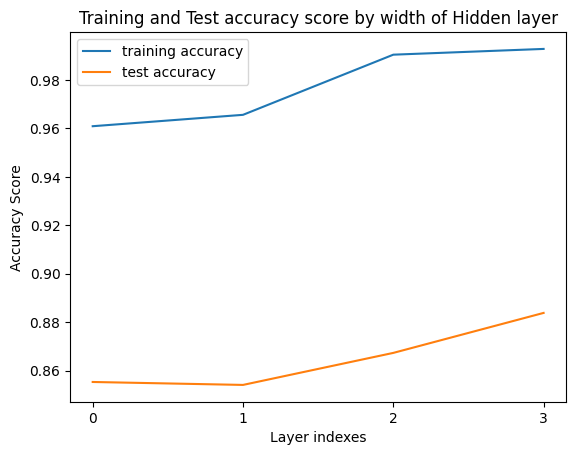

Layers: (20, 20) - Accuracy: 0.855
Layers: (20, 20, 20) - Accuracy: 0.854
Layers: (50, 20) - Accuracy: 0.867
Layers: (100, 100, 50) - Accuracy: 0.884


In [26]:
import matplotlib.pyplot as plt

indexes = [i for i in range(len(layers))]
plt.plot(indexes, a_train, label='training accuracy')
plt.plot(indexes, a_test, label='test accuracy')
plt.xlabel('Layer indexes')
plt.ylabel('Accuracy Score')
plt.title('Training and Test accuracy score by width of Hidden layer')
plt.xticks(range(len(indexes)), indexes)
plt.legend()
plt.show()

for layer, accuracy in zip(layers,a_test):
    print(f"Layers: {layer} - Accuracy: {accuracy:.3f}")

#### Questions

__What can you infer from the graph? (answer in the text box here).__

Think about the following:
* Do I have a deeper network that has fewer neurons but is doing better than my very wide network?
* How many weights did I need to train?

__Answer__

The deeper network (50,20) has fewer neurons compared to 100 neurons wider netword, but same accuracy.

## Task 4: Confusion matrix

A [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix) is a powerful way to visualise errors in your trained network. Plot a confusion matrix for your best model above (of course, plot using the test data).

Describe what you see in the confusion matrix.


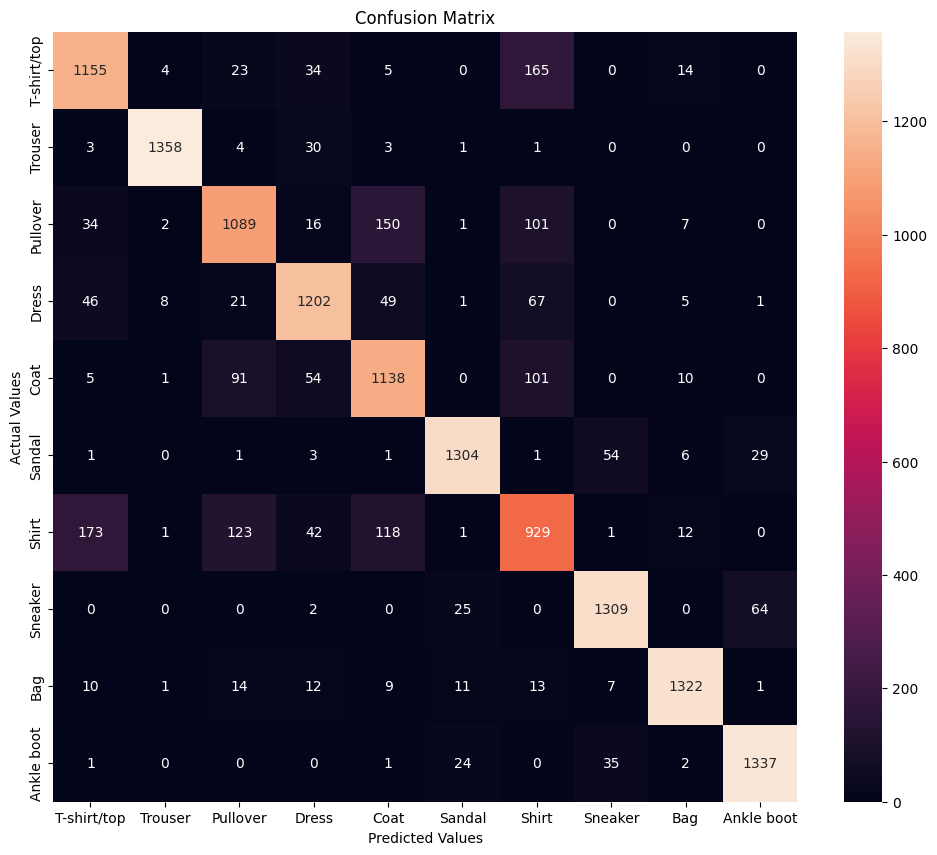

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, final_y_pred[2]) # (50,20) is the best w.r.t using lesser neurons but better performance

plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='g', xticklabels=text_labels, yticklabels=text_labels)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()
